In [13]:
import numpy as np
import pandas as pd
import tifffile as tf
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [ ]:
base_path = Path().resolve().parent
data_dir = base_path / "data"  

In [14]:
datasets = {"20x-noise1": ["actin-20x-noise1", "mito-20x-noise1"],
            "60x-noise1": ["actin-60x-noise1", "mito-60x-noise1"],
            "60x-noise2": ["actin-60x-noise2", "mito-60x-noise2"], 
            "membrane": ["membrane"]}
for dataset, subdatasets in tqdm(datasets.items(),desc="datasets"): 
    for subdataset in subdatasets:
        for snr in ["highsnr", "lowsnr"]:
            images = tf.imread(data_dir / "raw" / dataset / f"{subdataset}-{snr}.tif")
            print(f"Tiff image dimensions for {dataset}-{subdataset}-{snr}: {images.shape}")
        
            for index, im in enumerate(images):
                path = data_dir / "preprocessed" / dataset /  f"{dataset}-{subdataset}-{snr}" / f"{dataset}-{subdataset}-{snr}-{index}.png"
                path.parent.mkdir(parents=True,exist_ok=True)
                plt.imsave(path, im,cmap='gray')
            
            print(f"{dataset}-{subdataset}-{snr} saved")

datasets:   0%|          | 0/4 [00:00<?, ?it/s]

Tiff image dimensions for 20x-noise1-actin-20x-noise1-highsnr: (100, 2048, 2048)
20x-noise1-actin-20x-noise1-highsnr saved
Tiff image dimensions for 20x-noise1-actin-20x-noise1-lowsnr: (100, 2048, 2048)
20x-noise1-actin-20x-noise1-lowsnr saved
Tiff image dimensions for 20x-noise1-mito-20x-noise1-highsnr: (100, 2048, 2048)
20x-noise1-mito-20x-noise1-highsnr saved
Tiff image dimensions for 20x-noise1-mito-20x-noise1-lowsnr: (100, 2048, 2048)


datasets:  25%|██▌       | 1/4 [04:01<12:03, 241.11s/it]

20x-noise1-mito-20x-noise1-lowsnr saved
Tiff image dimensions for 60x-noise1-actin-60x-noise1-highsnr: (100, 2048, 2048)
60x-noise1-actin-60x-noise1-highsnr saved
Tiff image dimensions for 60x-noise1-actin-60x-noise1-lowsnr: (100, 2048, 2048)
60x-noise1-actin-60x-noise1-lowsnr saved
Tiff image dimensions for 60x-noise1-mito-60x-noise1-highsnr: (100, 2048, 2048)
60x-noise1-mito-60x-noise1-highsnr saved
Tiff image dimensions for 60x-noise1-mito-60x-noise1-lowsnr: (100, 2048, 2048)


datasets:  50%|█████     | 2/4 [08:02<08:02, 241.39s/it]

60x-noise1-mito-60x-noise1-lowsnr saved
Tiff image dimensions for 60x-noise2-actin-60x-noise2-highsnr: (100, 2048, 2048)
60x-noise2-actin-60x-noise2-highsnr saved
Tiff image dimensions for 60x-noise2-actin-60x-noise2-lowsnr: (100, 2048, 2048)
60x-noise2-actin-60x-noise2-lowsnr saved
Tiff image dimensions for 60x-noise2-mito-60x-noise2-highsnr: (100, 2048, 2048)
60x-noise2-mito-60x-noise2-highsnr saved
Tiff image dimensions for 60x-noise2-mito-60x-noise2-lowsnr: (100, 2048, 2048)


datasets:  75%|███████▌  | 3/4 [12:19<04:08, 248.28s/it]

60x-noise2-mito-60x-noise2-lowsnr saved
Tiff image dimensions for membrane-membrane-highsnr: (84, 2048, 2048)
membrane-membrane-highsnr saved
Tiff image dimensions for membrane-membrane-lowsnr: (84, 2048, 2048)


datasets: 100%|██████████| 4/4 [14:00<00:00, 210.06s/it]

membrane-membrane-lowsnr saved


In [ ]:
# re-doing image extraction and preprocessing for confocal and nucleus datasets

datasets = { "confocal" : ["actin-confocal" , "mito-confocal"],
            "nucleus" : ["nucleus"] }
for dataset, subdatasets in tqdm(datasets.items(),desc="datasets"): 
    for subdataset in subdatasets:
        for snr in ["highsnr", "lowsnr"]:
            images = tf.imread(data_dir / "raw" / dataset / f"{subdataset}-{snr}.tif")
            print(f"Tiff image dimensions for {dataset}-{subdataset}-{snr}: {images.shape}")
        
            for index, im in enumerate(images):
                path = data_dir / "preprocessed" / dataset /  f"{dataset}-{subdataset}-{snr}" / f"{dataset}-{subdataset}-{snr}-{index}.png"
                path.parent.mkdir(parents=True,exist_ok=True)
                plt.imsave(path, im,cmap='gray')
            
            print(f"{dataset}-{subdataset}-{snr} saved")

datasets:   0%|          | 0/2 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/zidaan.habib/dev/n2v-fl/data/raw/confocal/actin-highsnr.tif'

In [ ]:


images = tf.imread(data_dir / "raw" / "confocal" / "actin-confocal-highsnr.tif")
print(f"Tiff file dimensions: {images.shape}") 

Tiff file dimensions: (79, 1024, 1024)


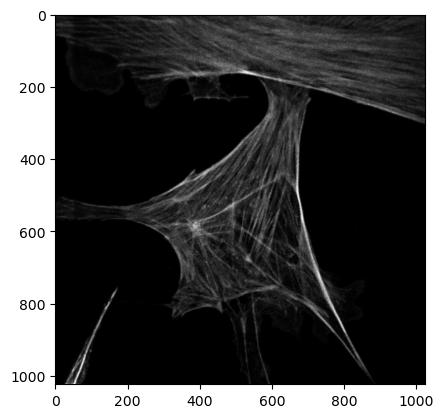

In [ ]:
plt.imshow(image[0],cmap='gray')

In [4]:
for index, im in enumerate(images):
    path = data_dir / "preprocessed" / f"actin-confocal-highsnr-{index}.png"
    plt.imsave(path, im,cmap='gray')

NameError: name 'images' is not defined

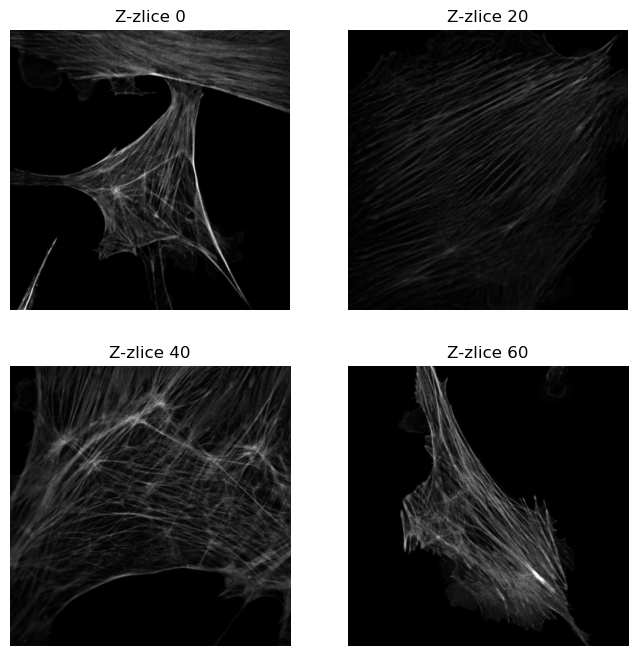

In [5]:
im4_actin = [images[0],images[20], images[40], images[60]]
fig, axs = plt.subplots(2,2,figsize=(8,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(im4_actin[i],cmap='gray')
    ax.set_title(f"Z-zlice {i*20}")
    ax.axis('off')

In [6]:
images = tf.imread(data_dir / "raw" / "nucleus" / "nucleus-highsnr.tif")
print(f"Tiff file dimensions: {images.shape}")
print(f"Data type: {images.dtype}") 

Tiff file dimensions: (104, 512, 512)
Data type: uint16


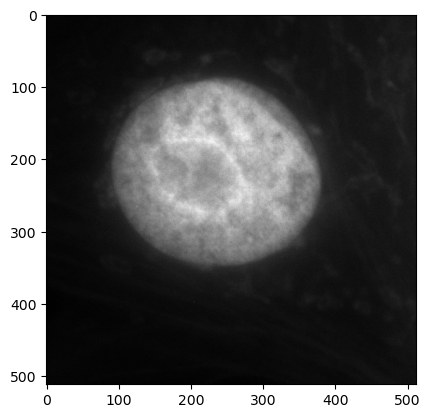

In [ ]:
plt.imshow(images[2],cmap='gray')

In [ ]:
for index, im in enumerate(images):
    path = data_dir / "preprocessed" / f"nucleus-highsnr-{index}.png"
    plt.imsave(path, im,cmap='gray')


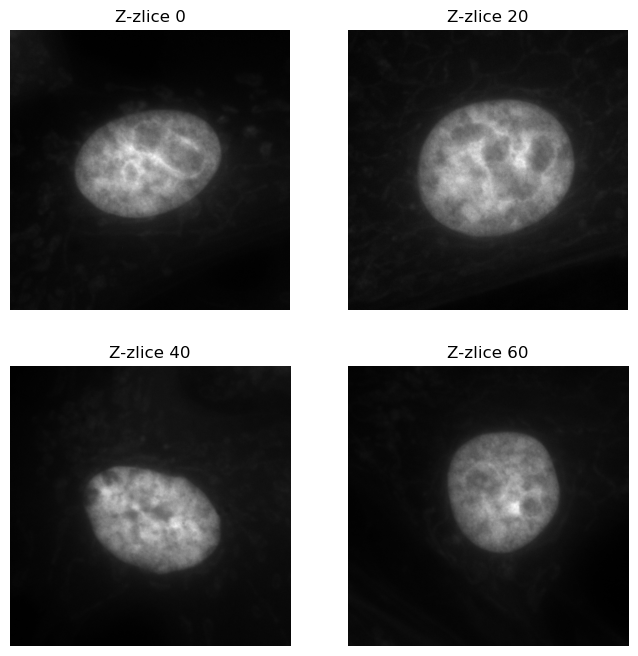

In [ ]:
im4 = [images[0],images[20], images[40], images[60]]
fig, axs = plt.subplots(2,2,figsize=(8,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(im4[i],cmap='gray')
    ax.set_title(f"Z-zlice {i*20}")
    ax.axis('off')

### 60x Noise 1: 

Tiff file dimensions: (100, 2048, 2048)


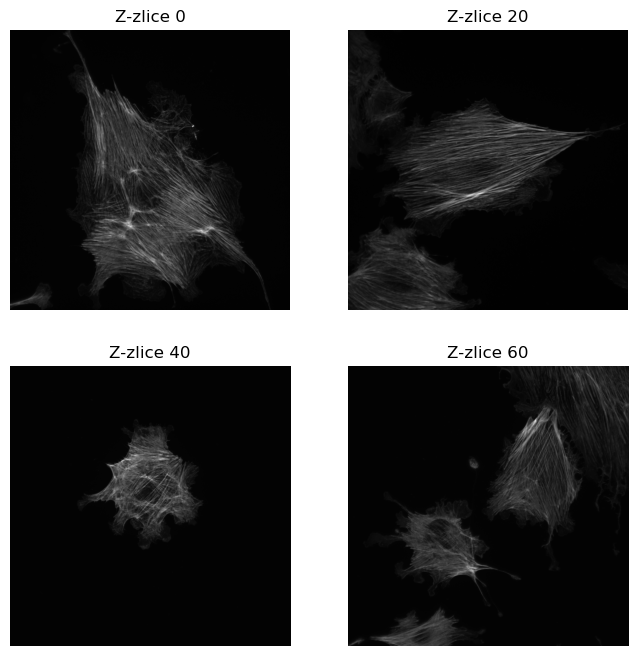

In [30]:
images_highsnr_noise1 = tf.imread(data_dir / "raw" / "60x-noise1" / "actin-60x-noise1-highsnr.tif")
print(f"Tiff file dimensions: {images_highsnr_noise1.shape}") 

im4 = [images_highsnr_noise1[0],images_highsnr_noise1[20], images_highsnr_noise1[40], images_highsnr_noise1[60]]
fig, axs = plt.subplots(2,2,figsize=(8,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(im4[i],cmap='gray')
    ax.set_title(f"Z-zlice {i*20}")
    ax.axis('off')

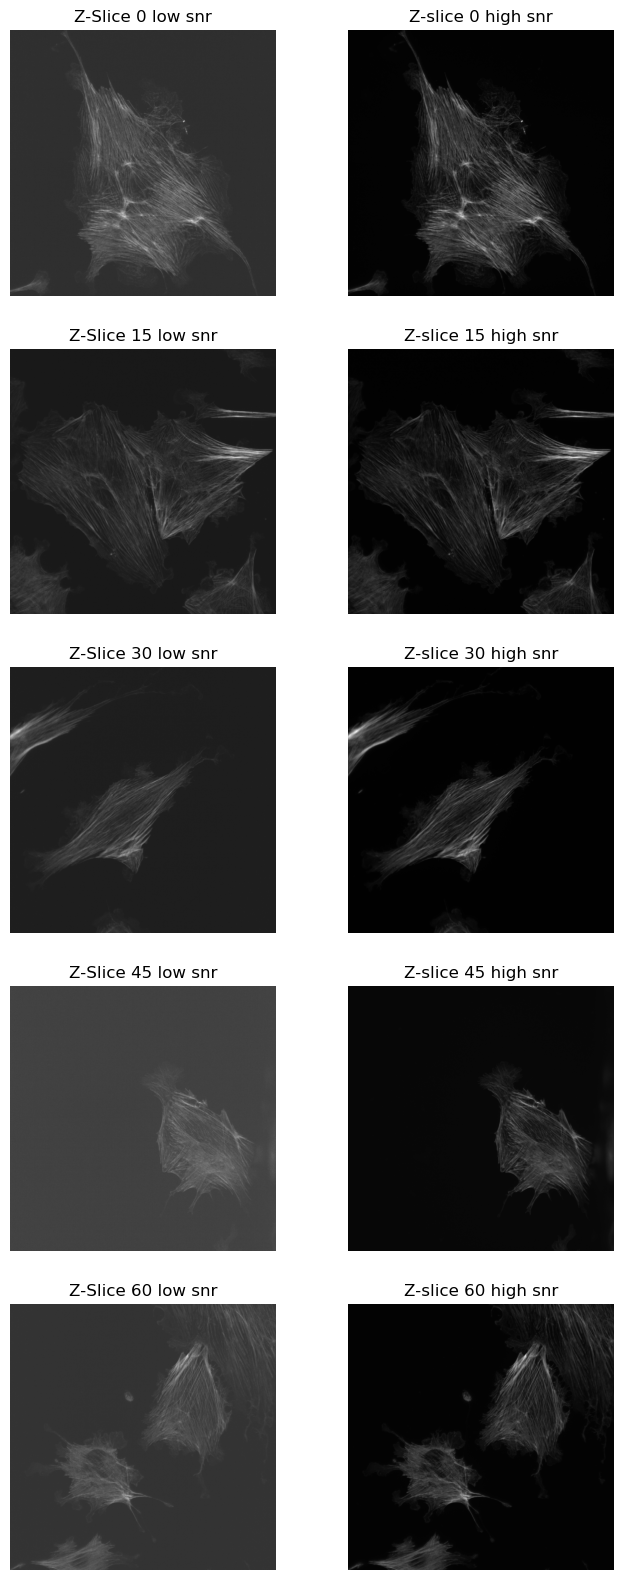

In [ ]:
images_lowsnr_noise1 = tf.imread(data_dir / "raw" / "60x-noise1" / "actin-60x-noise1-lowsnr.tif")

fig, axs = plt.subplots(5,2,figsize=(8,20))


for i in range(5):
    axs[i,0].imshow(images_lowsnr_noise1[i*15],cmap='gray')
    axs[i,0].set_title(f'Z-Slice {i*15} low snr') 
    axs[i,0].axis('off')
    axs[i,1].imshow(images_highsnr_noise1[i*15],cmap='gray')
    axs[i,1].set_title(f'Z-slice {i*15} high snr')
    axs[i,1].axis('off')

    

np.float64(0.19052948170944953)

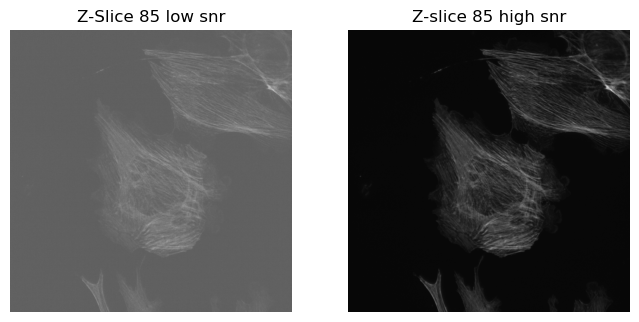

In [34]:
fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].imshow(images_lowsnr_noise1[85],cmap='gray')
axs[0].set_title(f'Z-Slice {85} low snr') 
axs[0].axis('off')
axs[1].imshow(images_highsnr_noise1[85],cmap='gray')
axs[1].set_title(f'Z-slice {85} high snr')
axs[1].axis('off')
ratio_lowsnr = images_lowsnr_noise1[85].max() /images_lowsnr_noise1[85].min() 
ratio_highsnr = images_highsnr_noise1[85].max() /images_highsnr_noise1[85].min() 
ratio_lowsnr / ratio_highsnr

In [26]:
ratio_lowsnr = images_lowsnr_noise1.max(axis=(1,2)) /images_lowsnr_noise1.min(axis=(1,2)) 
ratio_highsnr = images_highsnr_noise1.max(axis=(1,2)) /images_highsnr_noise1.min(axis=(1,2)) 
ratio_lowsnr / ratio_highsnr



array([0.06769551, 0.07118924, 0.04508576, 0.08580645, 0.16309916,
       0.07384191, 0.1288239 , 0.07260726, 0.07603725, 0.07267957,
       0.02938458, 0.11506559, 0.04434829, 0.05579594, 0.06306018,
       0.04835793, 0.07390095, 0.07840337, 0.05595914, 0.06797606,
       0.06923154, 0.10888036, 0.11644008, 0.05955328, 0.06330171,
       0.05621994, 0.06374926, 0.08063713, 0.08288745, 0.03575252,
       0.07311766, 0.05758431, 0.0765975 , 0.10724002, 0.06797326,
       0.06869499, 0.06134338, 0.07467402, 0.09333142, 0.0661145 ,
       0.04823494, 0.07482524, 0.05262938, 0.06184553, 0.07401093,
       0.03974196, 0.06653567, 0.0226483 , 0.07017099, 0.05409793,
       0.04078633, 0.06510776, 0.04292328, 0.06035419, 0.10243119,
       0.11754529, 0.07371998, 0.07160672, 0.01390064, 0.05661453,
       0.06883182, 0.05227257, 0.05890781, 0.05774997, 0.07167005,
       0.05796719, 0.09182437, 0.06482002, 0.10294992, 0.08024386,
       0.05802375, 0.04375348, 0.0730812 , 0.06295099, 0.04439

### 60x Noise 2

Tiff file dimensions: (100, 2048, 2048)


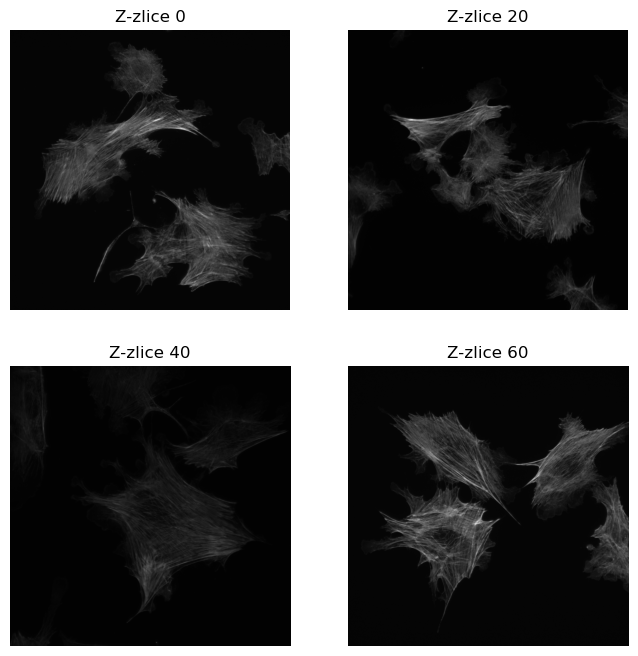

In [ ]:
images_highsnr_noise2 = tf.imread(data_dir / "raw" / "60x-noise2" / "actin-60x-noise2-highsnr.tif")
print(f"Tiff file dimensions: {images.shape}")

im4 = [images_highsnr_noise2[0],images_highsnr_noise2[20], images_highsnr_noise2[40], images_highsnr_noise2[60]]
fig, axs = plt.subplots(2,2,figsize=(8,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(im4[i],cmap='gray')
    ax.set_title(f"Z-zlice {i*20}")
    ax.axis('off')

(np.float64(-0.5), np.float64(2047.5), np.float64(2047.5), np.float64(-0.5))

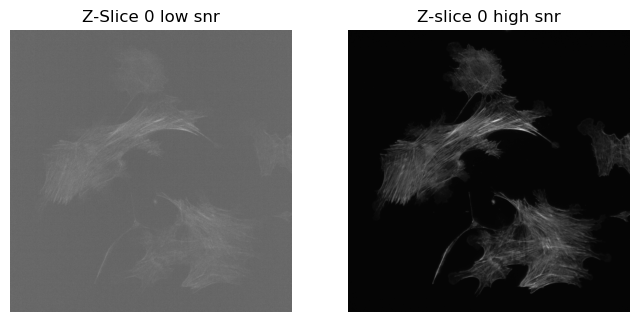

In [ ]:
images_lowsnr_noise2 = tf.imread(data_dir / "raw" / "60x-noise2" / "actin-60x-noise2-lowsnr.tif")

fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].imshow(images_lowsnr_noise2[0],cmap='gray')
axs[0].set_title('Z-Slice 0 low snr') 
axs[0].axis('off')
axs[1].imshow(images_highsnr_noise2[0],cmap='gray')
axs[1].set_title('Z-slice 0 high snr')
axs[1].axis('off')

(np.float64(-0.5), np.float64(2047.5), np.float64(2047.5), np.float64(-0.5))

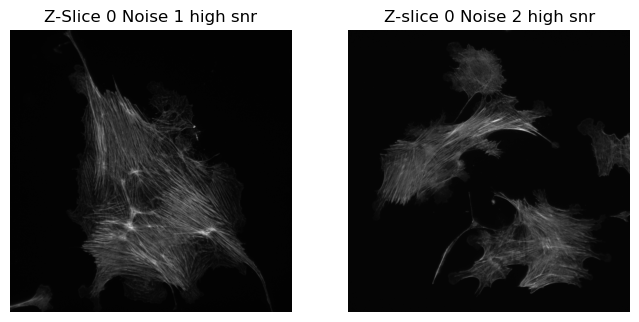

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8,8))
axs[0].imshow(images_highsnr_noise1[0],cmap='gray')
axs[0].set_title('Z-Slice 0 Noise 1 high snr') 
axs[0].axis('off')
axs[1].imshow(images_highsnr_noise2[0],cmap='gray')
axs[1].set_title('Z-slice 0 Noise 2 high snr')
axs[1].axis('off')